In [11]:
import pandas as pd                 # Manipular os dados
import os                           # Gerenciar arquivos no sistema operacional
import matplotlib.pyplot as plt     # Biblioteca para geração de gráficos
import seaborn as sns               # Biblioteca para gerar gráficos estilizados

# Criar variável para armazenar o caminho do diretório com os arquivos
dir_path = 'C:\\Users\\FIC\\Documents\\Henrique-Rodrigues\\005 - Desafios\\Desafio 01 - Super Atacadista\\arquivos\\vendas\\'

# Criar uma lista vazia para armazenar os caminhos completos
res = []

#
for path in os.listdir(dir_path):
    # Verificar se é um arquivo válido
    if os.path.isfile(dir_path + path):
        res.append(dir_path + path)

# Criar um dataframe vazio
file_combined = pd.DataFrame()

# Estrutura para combinar os arquivos
for file in res:
    df1 = pd.read_excel(file)
    file_combined = pd.concat([file_combined,df1])

dir_final = 'C:\\Users\\FIC\\Documents\\Henrique-Rodrigues\\005 - Desafios\\Desafio 01 - Super Atacadista\\arquivos\\vendas\\'
fileName = 'ArquivoCombinado.xlsx'

file_combined.to_excel(dir_final + fileName)


In [12]:
# Tabela fato - Responsável por gerar os valores de análise
file_combined.head()

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40


#### Importando as tabelas dimensões (DE-PARA)

In [13]:
# Carregar a tabela Clientes

path = 'C:\\Users\\FIC\\Documents\\Henrique-Rodrigues\\005 - Desafios\\Desafio 01 - Super Atacadista\\arquivos\\'
file = 'Dimensões.xlsx'

dfClientes = pd.read_excel(path + file, sheet_name='Cliente')

dfClientes.head()

,cdCliente,Razão Social,Status,Categoria,Cidade,UF
0,1339104,Vinicius e Filipe Cantina ME,A,Cantinas,Curitiba,PR
1,1339740,Sandra e Cláudio Cantina Ltda,A,Cantinas,Curitiba,PR
2,1339884,Vera e Analu Cantina ME,A,Cantinas,Curitiba,PR
3,1340322,Emilly e Vitor Cantina Ltda,A,Cantinas,Curitiba,PR
4,4837795,Kaique e Rafaela Cantina ME,A,Cantinas,Curitiba,PR


In [14]:
# Carregar a tabela Produtos

path = 'C:\\Users\\FIC\\Documents\\Henrique-Rodrigues\\005 - Desafios\\Desafio 01 - Super Atacadista\\arquivos\\'
file = 'Dimensões.xlsx'

dfProdutos = pd.read_excel(path + file, sheet_name='Produto')

dfProdutos.head()

,cdProduto,Descrição,cdGrupo
0,1,Produto 1,9999
1,2,Produto 2,9999
2,3,Produto 3,9999
3,4,Produto 4,9999
4,5,Produto 5,9999


In [15]:
# Carregar a tabela Grupo Produto

path = 'C:\\Users\\FIC\\Documents\\Henrique-Rodrigues\\005 - Desafios\\Desafio 01 - Super Atacadista\\arquivos\\'
file = 'Dimensões.xlsx'

dfGrupoProd = pd.read_excel(path + file, sheet_name='GrupoProduto')

dfGrupoProd.head()

,cdGrupo,Grupo,Linha
0,102,Leite em Pó,Alimentos
1,103,Açúcares,Alimentos
2,104,Doces Enlatados,Alimentos
3,105,Farinhas,Alimentos
4,106,Óleos,Alimentos


In [16]:
# Carregar a tabela Clientes

path = 'C:\\Users\\FIC\\Documents\\Henrique-Rodrigues\\005 - Desafios\\Desafio 01 - Super Atacadista\\arquivos\\'
file = 'Dimensões.xlsx'

dfVendedores = pd.read_excel(path + file, sheet_name='Vendedor')

dfVendedores.head()

,cdVendedor,Vendedor,cdSupervisor,Supervisor,cdGerente,Gerente,Equipe
0,669,Kaua Araujo,15,Fernando Silva,1,Victor Castro,Varejo
1,660,Julieta Gomes,25,Emily Rocha,1,Victor Castro,Varejo
2,183,Isabella Sousa,25,Emily Rocha,1,Victor Castro,Varejo
3,102,Gustavo Barros,25,Emily Rocha,1,Victor Castro,Varejo
4,196,Leonardo Cardoso,30,Diego Araujo,1,Victor Castro,Varejo


In [17]:
# Carregar a tabela Data

path = 'C:\\Users\\FIC\\Documents\\Henrique-Rodrigues\\005 - Desafios\\Desafio 01 - Super Atacadista\\arquivos\\'
file = 'Dimensões.xlsx'

dfData = pd.read_excel(path + file, sheet_name='Data')

dfData.head()

,Data,Ano,Mes,MesNum,Dia
0,2017-01-01,2017,Janeiro,1,1
1,2017-01-02,2017,Janeiro,1,2
2,2017-01-03,2017,Janeiro,1,3
3,2017-01-04,2017,Janeiro,1,4
4,2017-01-05,2017,Janeiro,1,5


Questão 02 - Qual a cobertura de clientes por ano

In [18]:
# Bloco utilizado para combinar as colunas ANO, Mês, Dia e MesNum do dataframe
# dfData, para que seja possível agregar os dados de modo a visualizar as informações
# por ano.

df_merge = file_combined.merge(dfData, # Tabela da direita (fornecedora das colunas faltantes)
                               left_on='DataEmissao', # Coluna que será utilizada como valor procaurado na tabela esq.
                               right_on='Data', # Coluna da tabela da direita que será utilizada para busca
                               how='left' # É a forma que os dados serão inseridos, ESQUERDA <--- DIRETA
                               )

df_merge.head(2)

,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,Data,Ano,Mes,MesNum,Dia
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.6,2017-01-12,2017,Janeiro,1,12
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.4,2017-01-12,2017,Janeiro,1,12


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Grafico ')

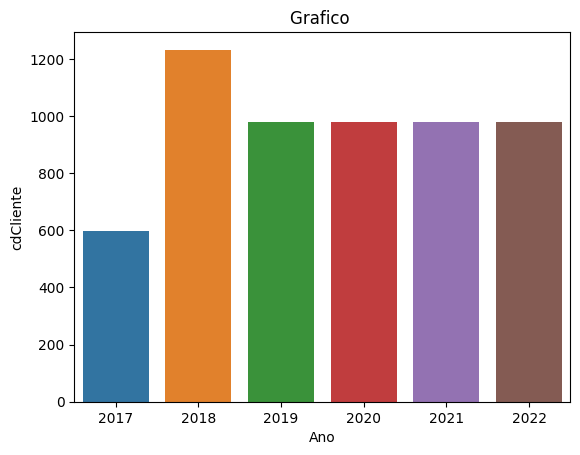

In [20]:
# Cria um novo dataframe, considerando apenas as colunas ANO e cdCliente do df_merge
df_contagem_cliente = df_merge.loc[:,['Ano','cdCliente']]

# Remover a duplicada para calcular a cobertura de clientes
# Sendo que para este cálculo é necessário eliminar os registros
# Duplicados, considera todas as colunas

df_contagem_cliente= df_contagem_cliente.drop_duplicates()

# Agrupa os dados, por meio de contagem, separando os dados
# através da coluna ANO
df_contagem_cliente = df_contagem_cliente.groupby(['Ano']).count()


sns.barplot(
            x = df_contagem_cliente.index, 
            y ='cdCliente',
            data = df_contagem_cliente
            )

plt.title('Grafico ')


### 3. Peso líquido total vendidos por ano?

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0, 0, '414.819'),
 Text(0, 0, '658.505'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656'),
 Text(0, 0, '61.4656')]

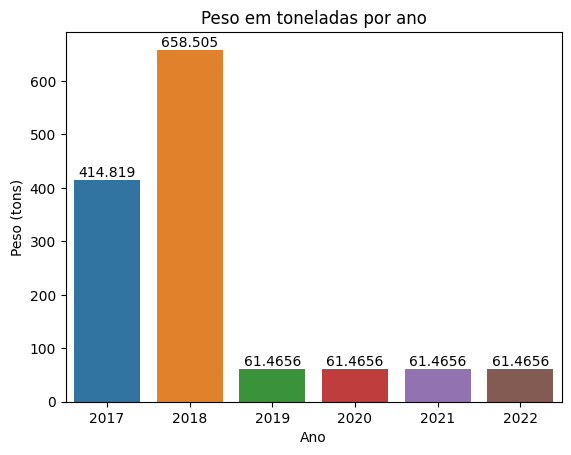

In [61]:
# Criando um novo datagrame com as colunas Ano e peso Líquido
df_peso_ano = df_merge.loc[:,['Ano','Peso Líquido']]

df_peso_ano = df_peso_ano.groupby('Ano').sum()

df_peso_ano['Peso_tons'] = df_peso_ano['Peso Líquido']/1000

graficos = sns.barplot(x = df_peso_ano.index, 
                       y= df_peso_ano['Peso_tons'])

plt.title('Peso em toneladas por ano')

plt.ylabel('Peso (tons)')

plt.xlabel('Ano')

graficos.bar_label(graficos.containers[0])


### 4. Qual é Total de Faturamento da Super Atacadista em todo o período?

In [142]:
df_faturamento = df_merge.loc[:,['Ano','ValorUnitario','QtdItens']]

df_faturamento['ValorTotal'] = df_faturamento['ValorUnitario']*df_faturamento['QtdItens']


df_faturamento


,Ano,ValorUnitario,QtdItens,ValorTotal
0,2017,8.83,6,52.98
1,2017,4.44,6,26.64
2,2017,0.96,10,9.60
3,2017,2.92,6,17.52
4,2017,2.81,6,16.86
...,...,...,...,...
302835,2022,1.62,24,38.88
302836,2022,3.25,12,39.00
302837,2022,3.26,12,39.12
302838,2022,3.14,12,37.68


In [143]:
df_faturamento = df_faturamento.loc[:,['ValorTotal','Ano']]

df_faturamento

,ValorTotal,Ano
0,52.98,2017
1,26.64,2017
2,9.60,2017
3,17.52,2017
4,16.86,2017
...,...,...
302835,38.88,2022
302836,39.00,2022
302837,39.12,2022
302838,37.68,2022


In [144]:
df_faturamento = df_faturamento.groupby('Ano').sum()

df_faturamento['Total em milhão'] = df_faturamento['ValorTotal']/10000

df_faturamento


,ValorTotal,Total em milhão
Ano,,
2017,6648222.05,664.822205
2018,10214809.43,1021.480943
2019,1046201.01,104.620101
2020,1046201.01,104.620101
2021,1046201.01,104.620101
2022,1046201.01,104.620101


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


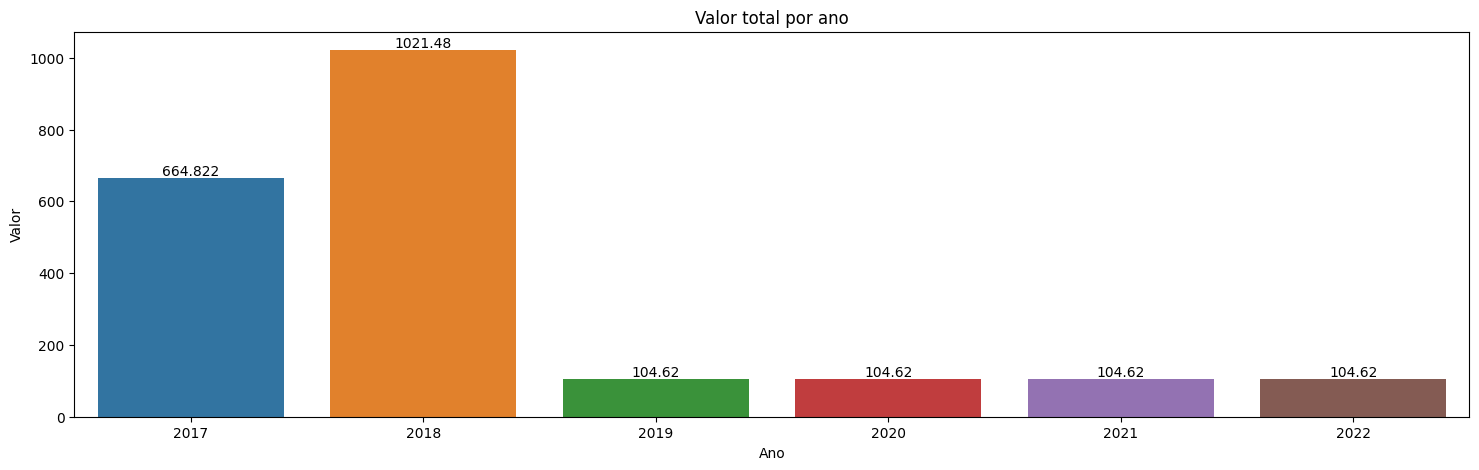

In [107]:
graficos = sns.barplot(x = df_faturamento.index, 
                       y= df_faturamento['Total em milhão'])

plt.title('Valor total por ano')

plt.ylabel('Valor')

plt.xlabel('Ano')

graficos.bar_label(graficos.containers[0])
graficos.figure.set_size_inches(18,5)

### 5. Qual foi a quantidade total de produtos vendidos em todo o período?

In [145]:
df_faturamento1 = df_merge.loc[:,['Ano','QtdItens']]

df_faturamento1 = df_faturamento1.groupby('Ano').sum()


df_faturamento1

,QtdItens
Ano,
2017,2167345
2018,3864838
2019,348989
2020,348989
2021,348989
2022,348989


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


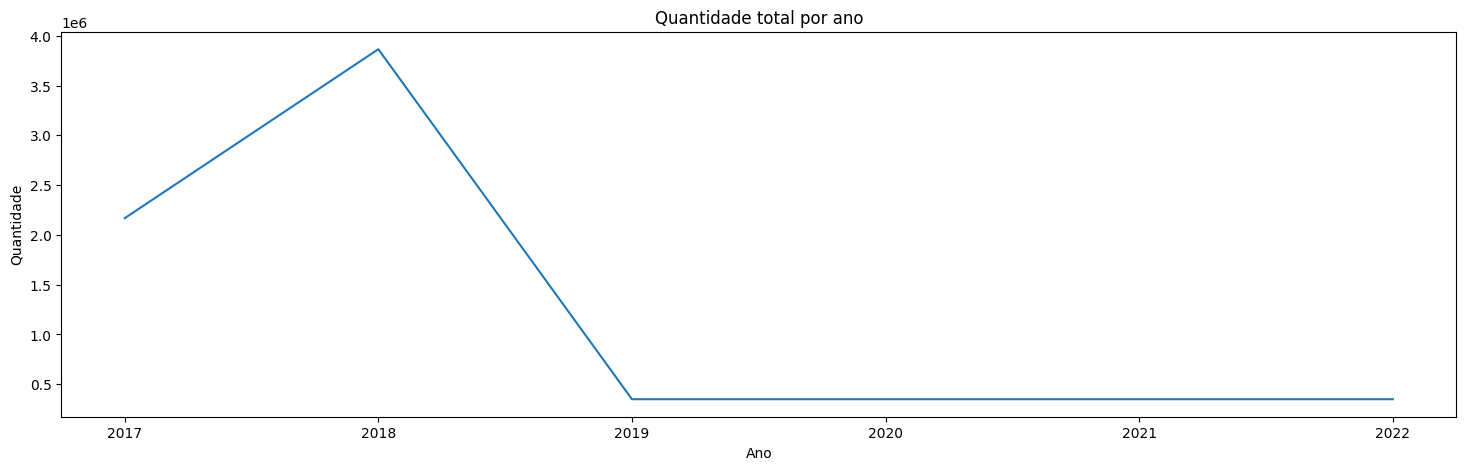

In [109]:
graficos = sns.lineplot(x = df_faturamento1.index, 
                       y= df_faturamento1['QtdItens'])

plt.title('Quantidade total por ano')

plt.ylabel('Quantidade')

plt.xlabel('Ano')

##graficos.bar_label(graficos.containers[0])
graficos.figure.set_size_inches(18,5)

### 6. Qual foi o total de peso em toneladas dos produtos vendidos em todo o
período?

In [132]:
peso_vendido = file_combined['Peso Líquido'].sum() / 1000
peso_vendido = round(peso_vendido,2)

print(f'O peso total vendido foi de {peso_vendido} toneladas.')

O peso total vendido foi de 1319.19 toneladas.


#### 7. Quantos clientes ativos e inativos temos em nossa empresa?
(Crie um gráfico de rosca para mostrar estes totais)

In [126]:
status = dfClientes.loc[:,['cdCliente','Status']]


status['Status'] = status['Status'].replace('A','Ativo')
status['Status'] = status['Status'].replace('I','Inativo')

status = status.groupby('Status').count()

status

,cdCliente
Status,
Ativo,1364
Inativo,47


([<matplotlib.patches.Wedge at 0x14d3ad44210>,
 [Text(-1.0939826195114473, 0.11490007922918268, 'Ativo'),
  Text(1.093982623545592, -0.11490004081941627, 'Inativo')],
 [Text(-0.5967177924607893, 0.06267277048864509, '97%'),
  Text(0.596717794661232, -0.0626727495378634, '3%')])

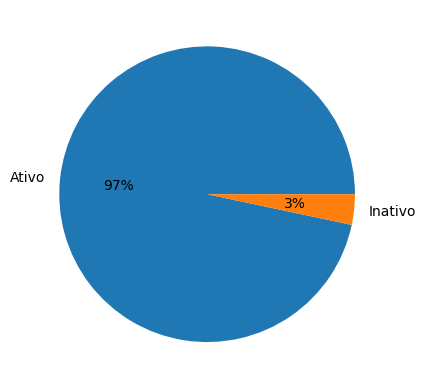

In [131]:
plt.pie(status['cdCliente'],
        labels=status.index,
        autopct='%.0f%%'
)

### 8. Qual foi o ano com maior ticket médio dos produtos?
(Ticket médio = Total faturado pela quantidade vendida)

In [164]:
#Seleção das colunas Ano, QtdeItens e Valor Unitário
df_ticket = df_merge.loc[:,['Ano','QtdItens','ValorUnitario']]

# Adicionar a coluna Valor Total
df_ticket['ValorTotal'] = df_ticket['QtdItens'] * df_ticket['ValorUnitario']

# Selecionar as colunas de interesse
df_ticket = df_ticket.loc[:,['Ano','QtdItens','ValorTotal']]

# Agrupar os campos QtdeItens e ValorTotal por Ano
df_ticket = df_ticket.groupby('Ano').sum()

# Adicionar a coluna Ticket Médio, com base no cálculo 
# Valor total / Qtde Itens por ano
df_ticket['Ticket Medio'] = df_ticket['ValorTotal'] / df_ticket['QtdItens']

df_ticket




,QtdItens,ValorTotal,Ticket Medio
Ano,,,
2017,2167345,6648222.05,3.067450
2018,3864838,10214809.43,2.643011
2019,348989,1046201.01,2.997805
2020,348989,1046201.01,2.997805
2021,348989,1046201.01,2.997805
2022,348989,1046201.01,2.997805


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


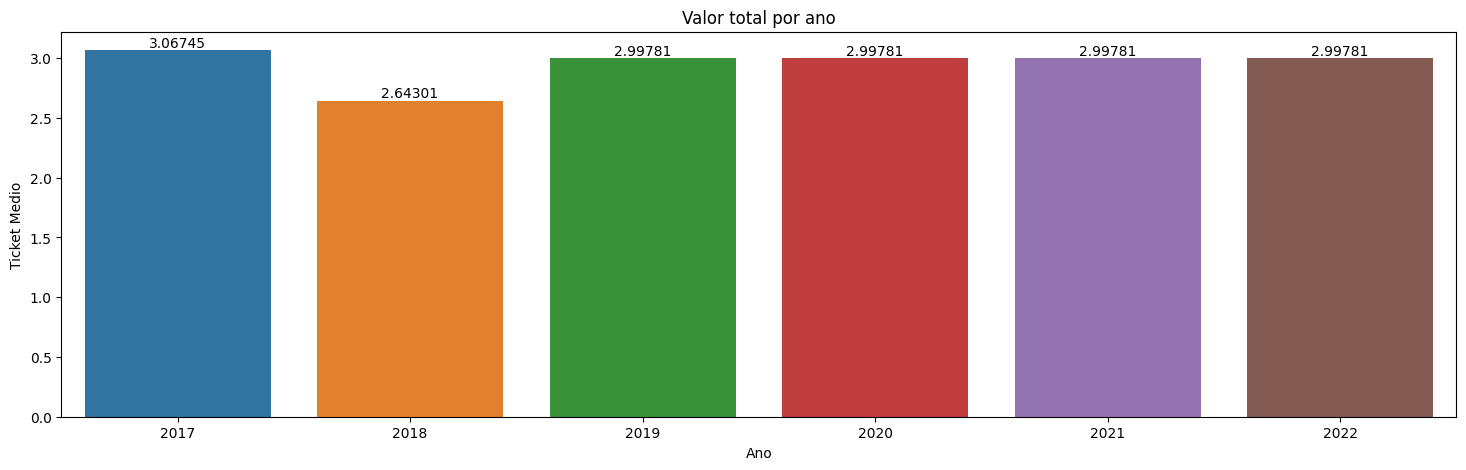

In [166]:
graficos = sns.barplot(x = df_ticket.index, 
                       y= df_ticket['Ticket Medio'])

plt.title('Valor total por ano')

plt.ylabel('Ticket Medio')

plt.xlabel('Ano')

graficos.bar_label(graficos.containers[0])
graficos.figure.set_size_inches(18,5)